<a href="https://colab.research.google.com/github/WanjaWhoopie/Geopandas/blob/main/Geopandas_learn_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notes**

A considerable proportion of the data generated every day is inherently spatial. From Earth Observation data and GPS data to data included in all kinds of maps, spatial data –also known sometimes as geospatial data or geographic information– are data for which a specific location is associated with each record.

Every spatial data point can be located on a map. This can be done using a certain coordinate reference system, for example, the geographical coordinates, which is based on the usual latitude-longitude pairs we use to specify where something is on the globe. This allows us to look at spatial relationships between the data.  

# **Imports**

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt


# **T1**

Read a Shapefile

GeoPandas can read various geospatial file formats, but a common one is the Shapefile. Download a Shapefile for your region of interest or use the built-in GeoPandas dataset.

In [ ]:
# Example using built-in dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<ipython-input-2-023f8c672b4d>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Explore the Data

In [ ]:
# Display the first few rows of the GeoDataFrame
print(world.head())


       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  


Plot the Data

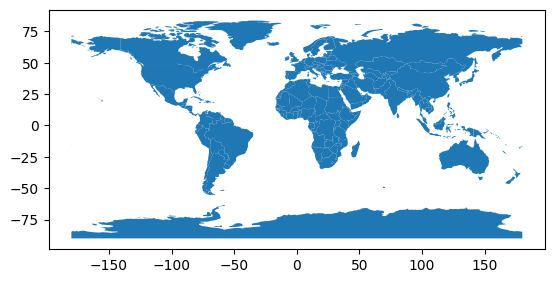

In [ ]:
# Plot the GeoDataFrame
world.plot()
plt.show()


Customizing the Plot

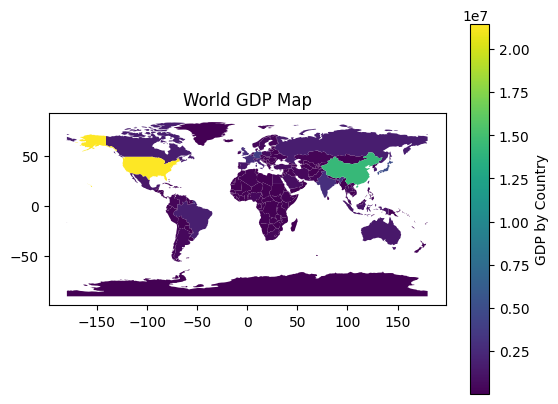

In [ ]:
# Customize the plot
world.plot(column='gdp_md_est', legend=True, legend_kwds={'label': "GDP by Country"})
plt.title("World GDP Map")
plt.show()


Spatial Operations

Perform basic spatial operations like intersection or buffering.

<ipython-input-6-22722c421534>:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['geometry'] = world.buffer(2)  # Buffer each country by 2 degrees


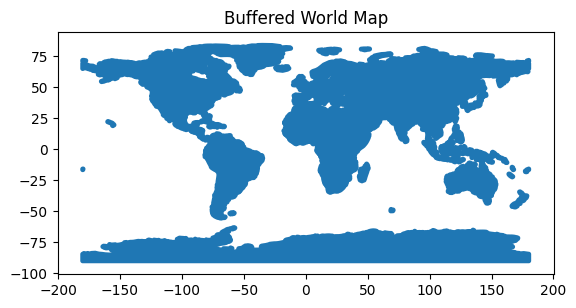

In [ ]:
# Example: Buffer countries and plot
world['geometry'] = world.buffer(2)  # Buffer each country by 2 degrees
world.plot()
plt.title("Buffered World Map")
plt.show()


Save to a New Shapefile

In [ ]:
# Save the GeoDataFrame to a new Shapefile
world.to_file("world_buffered.shp")


# **T2**

Coordinate Reference Systems (CRS)

GeoPandas supports different coordinate reference systems. Understanding and managing CRS is crucial when working with geospatial data. You can set and change the CRS of a GeoDataFrame using the crs attribute.

In [ ]:
# Set the CRS
world.crs = "EPSG:4326"

# Check the CRS
print(world.crs)


EPSG:4326


Geometry Operations:

GeoPandas provides various geometry operations, such as union, difference, intersection, and simplification. These operations can be applied to GeoDataFrames or individual geometries.

In [ ]:
# Example: Union of geometries
union_result = world.unary_union
print(union_result)


MULTIPOLYGON (((-63.175343470812344 -52.16307854017653, -63.19640956003383 -51.969786763064825, -63.19860683823492 -51.775362836598475, -63.18191453812019 -51.58164433378843, -63.14649042484096 -51.39046216042369, -63.09266930489808 -51.203623250498104, -63.02095986176082 -51.02289348820359, -62.93203984810982 -50.84998101790029, -62.82674968014376 -50.68652009980741, -62.70608449449267 -50.534055664000654, -62.57118474281052 -50.39402870870211, -62.423325412941566 -50.26776268086885, -62.263903978534884 -50.156450967802336, -62.094427190999916 -50.06114561800017, -60.89442719099991 -49.46114561800017, -60.723110084367164 -49.38529846734484, -60.54544726349193 -49.32581516408918, -60.362997823617334 -49.28321770903613, -60.17736286536993 -49.25787991978702, -59.99017144416453 -49.25002415027326, -59.803066274289456 -49.25971933947049, -59.617689313127116 -49.2868804064187, -59.4668306637933 -49.32366938923472, -59.306548522772836 -49.248612862556776, -59.117870277764425 -49.18231302146

Spatial Joins:

You can perform spatial joins between GeoDataFrames based on spatial relationships between their geometries.

In [ ]:
# Example: Spatial join
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
joined_data = gpd.sjoin(cities, world, how="inner", op='intersects')
print(joined_data.head())


<ipython-input-10-ac4b31ffd5fe>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


       name_left                   geometry  index_right     pop_est  \
0   Vatican City  POINT (12.45339 41.90328)          141  60297396.0   
1     San Marino  POINT (12.44177 43.93610)          141  60297396.0   
2          Vaduz   POINT (9.51667 47.13372)          141  60297396.0   
10        Monaco   POINT (7.40691 43.73965)          141  60297396.0   
19     Ljubljana  POINT (14.51497 46.05529)          141  60297396.0   

   continent name_right iso_a3  gdp_md_est  
0     Europe      Italy    ITA     2003576  
1     Europe      Italy    ITA     2003576  
2     Europe      Italy    ITA     2003576  
10    Europe      Italy    ITA     2003576  
19    Europe      Italy    ITA     2003576  


GeoSeries and Shapely:

A GeoSeries is the geometric column of a GeoDataFrame, and it's essentially a vectorized wrapper around a Shapely geometry object. Understanding Shapely operations can be useful when working with individual geometries.

In [ ]:
# Example: Shapely operations
from shapely.geometry import Point
point1 = Point(0, 0)
point2 = Point(1, 1)
result = point1.distance(point2)
print(result)


1.4142135623730951


Overlay Operations:

GeoPandas supports overlay operations for combining geometries using set-theoretic methods like union, intersection, and difference.



In [ ]:
# Example: Overlay operation
result = gpd.overlay(world, cities, how='intersection')
print(result.head())


Empty GeoDataFrame
Columns: [pop_est, continent, name_1, iso_a3, gdp_md_est, name_2, geometry]
Index: []


<ipython-input-12-5eacac370faf>:2: UserWarning: `keep_geom_type=True` in overlay resulted in 561 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = gpd.overlay(world, cities, how='intersection')


Geocoding:

GeoPandas can be used for geocoding (converting addresses to coordinates) using external services.

In [ ]:
# Example: Geocoding
from geopandas.tools import geocode
gdf = geocode("New York, USA")
print(gdf)


                     geometry  \
0  POINT (-76.17238 43.06909)   

                                             address  
0  Destiny USA Mall, 13290, Syracuse, New York, U...  


Interactive Mapping:

For interactive mapping, you can use libraries like Folium or Plotly in combination with GeoPandas.

In [ ]:
import folium

# Example: Create a Folium map
m = folium.Map(location=[0, 0], zoom_start=2)
folium.GeoJson(world).add_to(m)
m.save('world_map.html')
m